In [2]:
import pandas as pd
df = pd.read_csv('final_different_wait_time_station.csv')
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,total_requests,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM
0,0.700637,2023,2,25,70.418182,178.281818,47,2,1,True,...,157,3,5,6,1,60,100,100,900,1000
1,0.707006,2023,2,25,70.135135,171.414414,46,2,1,True,...,157,3,5,6,1,60,100,100,900,1000
2,0.757962,2023,2,25,67.781513,194.537815,38,2,1,False,...,157,3,5,6,1,60,100,100,900,1000
3,0.689498,2023,2,27,69.860927,341.655629,68,2,1,True,...,219,3,5,6,1,60,100,100,900,1000
4,0.694064,2023,2,27,68.934211,328.250000,67,2,1,True,...,219,3,5,6,1,60,100,100,900,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.950276,2023,2,28,546.366279,107.273256,9,2,1,True,...,181,3,5,6,1,60,100,800,900,1000
68,0.961326,2023,2,28,547.172414,148.793103,7,2,1,False,...,181,3,5,6,1,60,100,800,900,1000
69,0.944751,2023,2,28,715.064327,106.643275,10,2,1,True,...,181,3,5,6,1,60,100,1000,900,1000
70,0.961326,2023,2,28,702.247126,93.695402,7,2,1,True,...,181,3,5,6,1,60,100,1000,900,1000


In [3]:
df['combined'] = df.apply(lambda row: f"{row['mode']}_{row['cost_mode']}_{row['IMPERFECT_GENERATIVE_MODEL']}_{row['BETTER_GEN_MODEL']}", axis=1)
df
mapping = {'1_1_False_False': 'greedy',
 '2_1_False_False': 'perfect',
 '2_1_True_True': 'imperfect_ours',
 '2_1_True_False': 'imperfect_baseline',
 }


# Rename the values in the 'combined' column based on the mapping
df['combined'] = df['combined'].map(mapping)
df = df.sort_values(by='combined')
# Display the DataFrame to verify the changes
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM,combined
26,1.000000,2023,2,26,354.902985,53.813433,0,2,1,True,...,3,5,6,1,60,100,600,900,1000,imperfect_baseline
39,1.000000,2023,2,25,486.745223,65.974522,0,2,1,True,...,3,5,6,1,60,100,800,900,1000,imperfect_baseline
22,0.685083,2023,2,28,69.435484,292.782258,57,2,1,True,...,3,5,6,1,60,100,100,900,1000,imperfect_baseline
37,0.974522,2023,2,25,224.594771,101.078431,4,2,1,True,...,3,5,6,1,60,100,400,900,1000,imperfect_baseline
19,0.738806,2023,2,26,70.232323,185.868687,35,2,1,True,...,3,5,6,1,60,100,100,900,1000,imperfect_baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,1.000000,2023,2,25,507.579618,45.331210,0,2,1,False,...,3,5,6,1,60,100,800,900,1000,perfect
46,1.000000,2023,2,25,674.012739,48.611465,0,2,1,False,...,3,5,6,1,60,100,1000,900,1000,perfect
47,0.954338,2023,2,27,272.545455,218.416268,10,2,1,False,...,3,5,6,1,60,100,400,900,1000,perfect
53,0.995434,2023,2,27,746.917431,122.752294,1,2,1,False,...,3,5,6,1,60,100,1000,900,1000,perfect


In [4]:
import pandas as pd

column = 'Max wait time at station'

import numpy as np
grouped_df = df.groupby([column, 'combined']).median().reset_index()
pivot_df = grouped_df.pivot(index=column, columns='combined', values='serviced ratio')
pivot_df['baseline_improvement'] = ((pivot_df['imperfect_ours'] / pivot_df['imperfect_baseline']) - 1)

o = pivot_df['imperfect_ours']
t = pivot_df['imperfect_baseline']
p = pivot_df['perfect']
pivot_df['theoretical maxiumum'] = (o-t)/(p-t) 
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x < 0 else x)
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x > 1 else x)

final_table = pivot_df[['imperfect_baseline', 'imperfect_ours', 'perfect', 'baseline_improvement', 'theoretical maxiumum']]

# Function to format floats to 4 significant figures
def format_float(x):
    return f"{100*x:.4g}" if isinstance(x, (float, np.floating)) else x

# Apply the formatting function to the entire DataFrame
final_table = final_table.applymap(format_float)

# Convert to LaTeX table
latex_table = final_table.to_latex(index=False, escape=False)

# Save the LaTeX table to a file
with open('table.tex', 'a') as f:
    f.write(latex_table)

final_table

combined,imperfect_baseline,imperfect_ours,perfect,baseline_improvement,theoretical maxiumum
Max wait time at station,,,,,
100,69.83,69.74,75.34,-0.1291,nan
400,95.07,93.11,97.08,-2.06,nan
600,94.57,95.99,98.31,1.493,37.78
800,98.03,96.9,99.09,-1.152,nan
1000,97.49,97.76,99.77,0.2834,12.1
1200,98.94,97.31,99.32,-1.651,nan


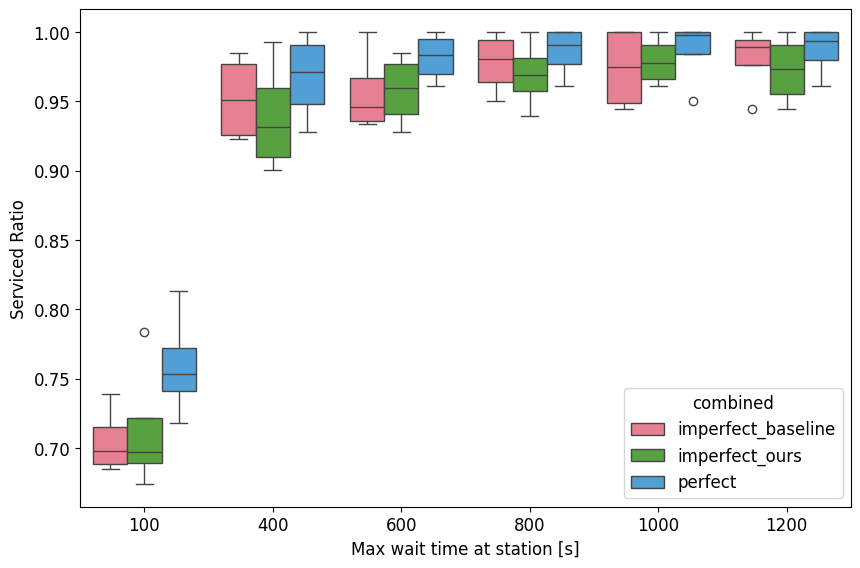

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'combined', 'Max wait time at station', and 'serviced ratio'

# Set the font size
plt.rcParams.update({'font.size': 12})

# Calculate figure size
a4_length_mm = 297
half_a4_length_mm = a4_length_mm / 2
half_a4_length_inches = half_a4_length_mm / 25.4  # Convert mm to inches
figure_width = half_a4_length_inches * 1.5  # Adjust width to maintain aspect ratio

# Create a boxplot with the new figure size
plt.figure(figsize=(figure_width, half_a4_length_inches))
sns.boxplot(x='Max wait time at station', y='serviced ratio', hue='combined', data=df, palette='husl')

# Set labels and title
plt.xlabel('Max wait time at station [s]')
plt.ylabel('Serviced Ratio')
# plt.title(f'Our method Mean improvement over baseline: {ratio.mean():.2f}')

# Adjust layout
plt.tight_layout()

# Save the plot with DPI 300
plt.savefig('/home/igorsadalski/Desktop/igor_master_theis/final_results/main_different_wait_stations.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()